# Tutorial Milestone 1 - Jacob Gartenstein

https://jgartens.github.io/

   For this tutorial, I plan on analyzing one of several datasets relating to music features, reviews, and consumption.  Music is my proposed focus because it relates to my life and studies in areas outside of computer science.  My second major is Jazz Studies, and my computer science capstone is a machine learning project that aims to create a generative dance graphic based on data connecting musical features and dance patterns.  This tutorial will help with my own work in this project, for which we will also be scraping and analyzing the song data provided by the Spotify API.  Below I propose three data sets of potential focus for this tutorial.

Spotify Audio Features – Available on Kaggle, posted by tomigelo 
	This Spotify Audio Features dataset is the most intriguing to me because of its relation to my capstone project.  The dataset describes songs (rows) with several different variables, including artist name, track ID, track name, artist name.  The remaining 18 variables are the audio features themselves, which include common musical features like duration, tempo, time signature, and key signature, and also other features coined by Spotify, for example acousticness and danceability.  There’s information about roughly 130k songs in the dataset.  My primary source of interest in this dataset is the connection with my capstone project, and the prospect of having multiple opportunities for different classes to familiarize myself with this information and how to work with it efficiently.  I also think that the finalized tutorial for this course done on the Spotify API would be a valuable resource to include with the capstone project, and it could even be edited to describe exactly the processes involved in the capstone.  For the tutorial, this data could be analyzed in several ways.  Various audio features could be combined and compared in order to reach informative conclusions.  For example, what effect does tempo have on danceability?  What connection might mode (the musical mode, scale or sound of a piece) have with Spotify’s variable valence (happiness meter, basically)?  The dataset is also alluring because of its size and uniformity -  13k songs is a lot, and Spotify describes exactly the format of each feature on its website. 
Link: https://www.kaggle.com/tomigelo/spotify-audio-features/data

Spotify’s Worldwide Daily Song Ranking – Available on Kaggle, posted by Eduardo 
	Once again, this dataset is compiled from information provided by Spotify.  This data, however, pertains to users’ consumption of the music rather than attributes of the music itself.  The data set contains two years worth of daily rankings 1 – 200 for the most listened songs on Spotify in 53 different countries.  There are over 2 million rows of data corresponding to 18,598 different songs and 105 billion total streams.  This information can be analyzed to produce interesting findings related to longevity of popularity of songs, trends in popular music in different regions of the world, and countless other observations. 
Link: https://www.kaggle.com/edumucelli/spotifys-worldwide-daily-song-ranking

Amazon’s Digital Music Purchase Reviews  -- 
	This dataset, provided by some guy on reddit assumedly via Amazon, gives over 1 million different user reviews on digital music purchased from Amazon.  The direct input from users makes this an interesting dataset to work with, and analysis would require more text parsing then with the other sets.  For this, it would be interesting to find trends in key words within reviews, and explore connections between those keywords and the music being reviewed.  
Link: 


## Milestone 2: Extraction, Transform, and Load (ETL) + Exploratory Data Analysis 

I'm choosing to continue with the first data set from above, the Spotify Audio Features.  I'm choosing this data set because of it's breadth - it contains both popularity data (based on # of plays) and data about the data itself.  I'll be using the data set from April 2019 because it's the largest and most recent.  Since the data set comes as a CSV file, it's easy to load into Pandas - which I do below.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
spotify_df = pd.read_csv("./data/SpotifyAudioFeaturesApril2019.csv")
spotify_df.head()

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0


This data is already upkept pretty well - each row records a single song and each column records specific attributes for that song.

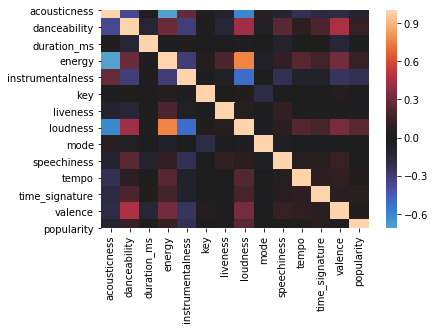

In [3]:
correlation = spotify_df[spotify_df.columns.tolist()].corr()
sns.heatmap(correlation, center = 0)

This chart displays the correlation between all the quantifiable variables in the set.  Black indicates no correlation.  Blue hue indicates negative correlation and red hue indicates positive correlation.  

This plot largely follows common sense.  Variables like key or duration (ms) wouldn't be correlated with variables that describe the feel of the music like acousticness, danceability, energy, etc etc.  On the other hand, it makes sense that energy and loudness are positively correlated, and that variables speechiness and instrumentalness are negatively correlated.

Basically -- nothing too suprising here.

In [33]:
artist_counts = spotify_df["artist_name"].value_counts()
artist_counts_df = pd.DataFrame(artist_counts)

In [34]:
artist_counts_df.head(10)

,artist_name
Johann Sebastian Bach,3621
Wolfgang Amadeus Mozart,1755
Armin van Buuren,1124
Ludwig van Beethoven,928
Frédéric Chopin,614
Claude Debussy,451
Image Sounds,369
Waka Flocka Flame,273
Los Cadetes De Linares,266
Antonio Vivaldi,254


As a little experiment, I'm going to try to plot the relationship between the amount of times an artist appears in the data set with their mean popularity.

In [25]:
mean_pop = spotify_df.groupby("artist_name")["popularity"].mean()

In [47]:
artist_counts_df = artist_counts_df.rename(columns={"artist_name": "freq"})

In [48]:
artist_counts_df['mean_pop'] = mean_pop
artist_counts_df.head(10)

,freq,mean_pop
Johann Sebastian Bach,3621,8.880144
Wolfgang Amadeus Mozart,1755,10.437607
Armin van Buuren,1124,14.883452
Ludwig van Beethoven,928,11.779095
Frédéric Chopin,614,13.648208
Claude Debussy,451,11.077605
Image Sounds,369,0.192412
Waka Flocka Flame,273,12.717949
Los Cadetes De Linares,266,6.454887
Antonio Vivaldi,254,15.023622


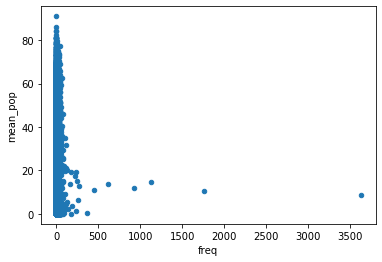

In [45]:
artist_counts_df.plot(x = "freq", y = "mean_pop", kind = "scatter")

This isn't very illustritive, so I'll filter it to zoom in on the lower part of the scale.

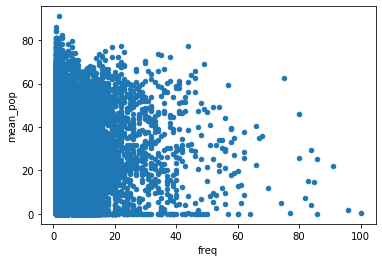

In [44]:
artist_counts_df[artist_counts_df['freq'] <= 100].plot(x = "freq", y = "mean_pop", kind = "scatter")

Still isn't incredibly informative, but we can at least deduce that the most popular artists have less songs in the dataset. This might be because emerging artists get lots of hype and streams, and jump to the top of the charts.  